In [5]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

#Lundquist Griffin griffin.lundquist@studio.unibo.it,
#McCallan Oliver, oliver.mccallan@studio.unibo.it
#Mendoza Alberto, alberto.mendozaperea@studio.unibo.it
#Simon Christopher, ronald.simon@studio.unibo.it
#Lanccetti Valerico, valerico.laccetti@studio.unibo.it




import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
# pip install google-colab


/Users/pelle/.zshenv:.:6: no such file or directory: /usr/local/env
DEPRECATION: Loading egg at /usr/local/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py) ... done
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [19 lines of output]
      /private/var/folders/n9/r8x6svc56f

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

# # come pesco il dataset ?

ModuleNotFoundError: No module named 'google'

In [6]:
train_size = 0.01 # train size chosen to have a few tousands of elements
cutoff_variance = .9 # the total amount of variance explained by the selected transformed features
cv = 5
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook

train_ds = pd.read_csv('./train.csv')
test_ds = pd.read_csv('./test.csv')

print("Shape of the training data {}".format(train_ds.shape))
print("Shape of the test data {}".format(test_ds.shape))

Shape of the training data (200000, 77)
Shape of the test data (100000, 76)


In [7]:
# show 10 random records
train_ds.sample(n=10, axis=0, replace=False, random_state = random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [8]:
# number of unique values
train_ds.nunique().sort_values(ascending=False)[:30]

id            200000
feature_15       105
feature_60        99
feature_59        92
feature_73        91
feature_46        87
feature_28        78
feature_32        77
feature_54        72
feature_61        70
feature_63        70
feature_19        66
feature_55        65
feature_47        63
feature_62        61
feature_3         59
feature_29        58
feature_67        57
feature_41        56
feature_5         55
feature_22        55
feature_43        53
feature_69        52
feature_9         51
feature_74        50
feature_24        50
feature_51        49
feature_27        49
feature_70        49
feature_2         48
dtype: int64

In [9]:
target = 'target'
classes = train_ds[target].unique()
classes.sort()
print(classes)

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


In [10]:
# create X
le = LabelEncoder()
y = le.fit_transform(train_ds[target])
X = train_ds.drop(['id', target], axis=1)

In [11]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


In [13]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y
                                                    , train_size = train_size
                                                    , random_state = random_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train_full.shape[0]))
print("There are {} samples in the testing dataset".format(X_test_full.shape[0]))
print("Each sample has {} features".format(X.shape[1]))

There are 2000 samples in the training dataset
There are 198000 samples in the testing dataset
Each sample has 75 features


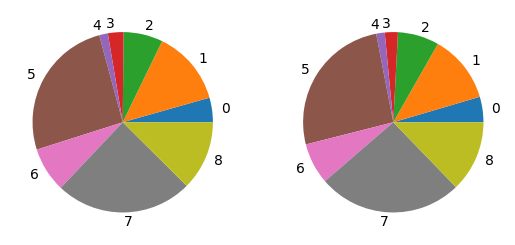

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0]);
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# select features 
k_best = 30  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k_best)

# SPIEGAZIONE
# L'informazione mutua tra queste variabili è massima quando la conoscenza del valore di una variabile fornisce la massima informazione sulla variabile con cui è correlata.
# 'SelectKBest' si occupa di applicare 'mutual_info_classif' tra ogni caratteristica e le etichette di classe. Infine seleziona le 'k_best' che hanno ottenuto un punteggio migliore

X_train = selector.fit_transform(X_train_full, y_train)
X_test = selector.transform(X_test_full)

'''
    Alla fine di questo processo, X_train conterrà solo le prime k caratteristiche più informative del set di addestramento, 
    e X_test sarà trasformato utilizzando le stesse caratteristiche selezionate. Questo è utile per garantire che il modello 
    sia allenato solo sulle caratteristiche più informative e che il processo di selezione delle caratteristiche non influenzi 
    i dati di test in alcun modo.
'''

In [20]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [21]:
from sklearn.model_selection import ParameterGrid
trials = {lbl: len(list(ParameterGrid(models[lbl]['param']))) for lbl in model_lbls}
trials

{'dt': 38, 'rf': 56}

In [23]:
# Grid search
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])

for scoring in scorings:
    for m in model_lbls:
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=cv,
                           scoring = scoring,

                           )

        clf.fit(X_train, y_train)
        clfs.append(clf)
        y_true, y_pred = y_test, clf.predict(X_test)
        # y_preds.append(y_pred)
        cr = classification_report(y_true,y_pred, output_dict=True
                                   , zero_division=1
                                   )
        results.loc[len(results)] = [scoring,models[m]['name'],clf.best_params_
                                    # ,(clf.cv_results_['mean_fit_time'].sum()+clf.cv_results_['mean_score_time'].sum())*n_splits
                                    ,cr['accuracy']
                                    ,cr['macro avg']['precision']
                                    ,cr['macro avg']['recall']
                                    ,cr['macro avg']['f1-score']]





In [24]:
for score in scorings:
    scoring_filter = score
    display(results[results.scoring==scoring_filter]\
                .sort_values(by=scoring_filter,ascending=False)\
                .drop('scoring',axis=1)\
                .style.format(precision=3)\
                .set_caption('Results for scoring "{}"'.format(scoring_filter)))

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 8, 'n_estimators': 20}",0.330,0.153,0.171,0.359
0,Decision Tree,"{'class_weight': None, 'max_depth': 4}",0.310,0.576,0.157,0.125


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 20}",0.270,0.159,0.173,0.158
2,Decision Tree,"{'class_weight': None, 'max_depth': 14}",0.241,0.141,0.152,0.142


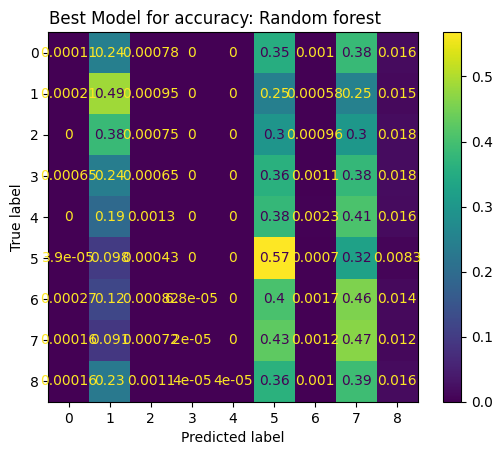

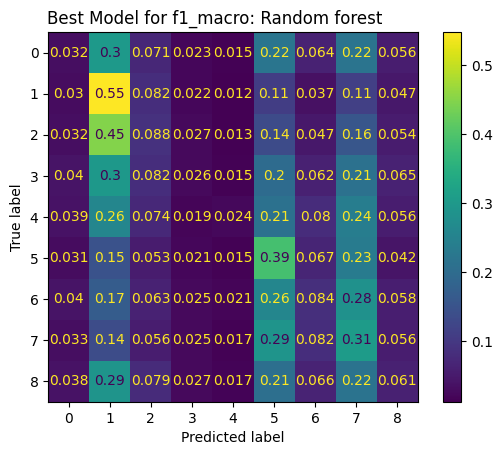

In [25]:
for score in scorings:
    scoring_filter = score
    # bests[score] = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    best_row = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    disp = ConfusionMatrixDisplay.from_estimator(X=X_test, y=y_test, estimator = clfs[best_row], normalize='true')
    # disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[bests[score],'model']))
    disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[best_row,'model']))
plt.show()

In [ ]:
# final test with best model trained on all (train) data